DNN(Deep Neural Network) for classification

objective: Classifiy if the given raisin data are Kecimen or Besni

In [1]:
import pandas as pd

raisin = pd.read_csv("https://raw.githubusercontent.com/KnightChaser/ML-challenge/main/EX_challenging_problems/02_raisin_classification/Raisin_Dataset.csv")
raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [2]:
# Which type does the dataframe have?

print(pd.unique(raisin["Class"]))

['Kecimen' 'Besni']


In [3]:
raisin_input  = raisin[["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "ConvexArea", "Extent", "Perimeter"]].to_numpy()
raisin_target = raisin["Class"].to_numpy()

<ipython-input-4-1fc00e10286a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = raisin.corr()


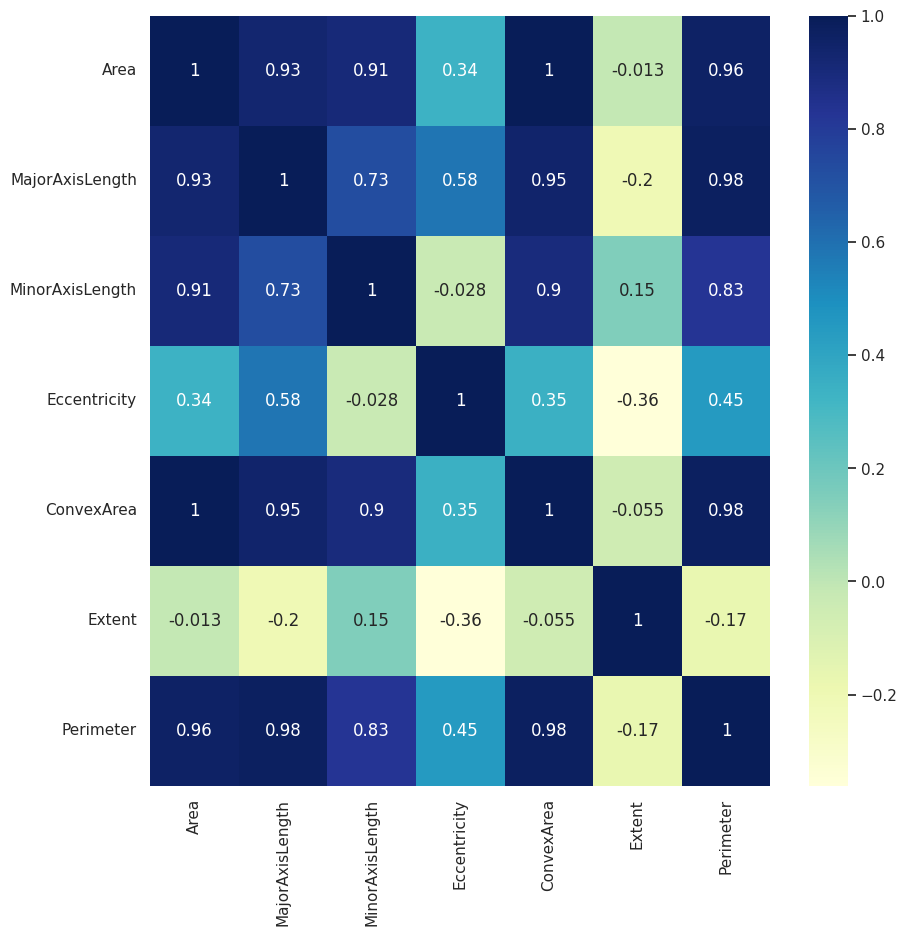

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix (Just check for fun)
correlation = raisin.corr()

# heatmap
plt.figure(figsize = (10,10))
sns.set(font_scale = 1)
sns.heatmap(correlation, annot = True, cbar = True, cmap = "YlGnBu")

plt.show()

# At least, we can know Area, MajorAxisLength, MinorAxisLength, ConvexAre have relatively high correlations each other

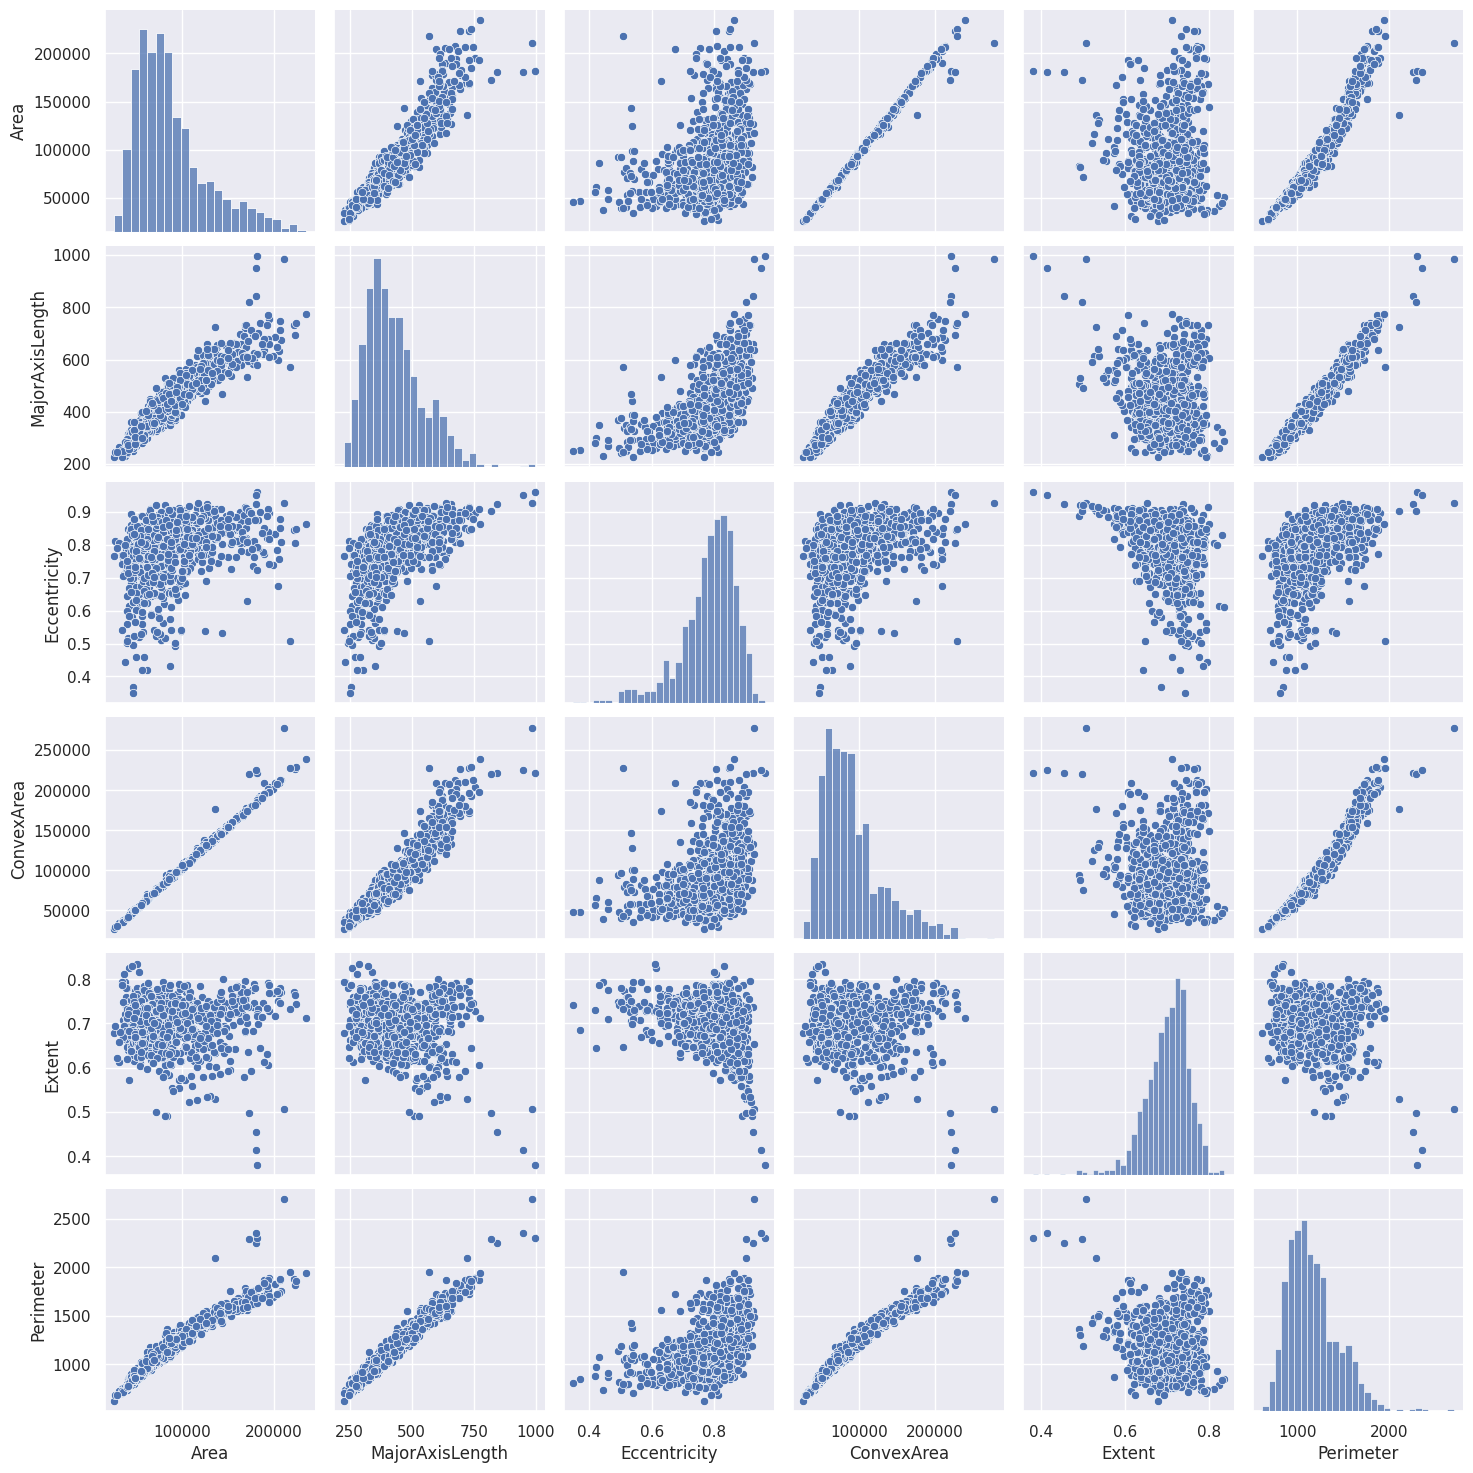

In [5]:
sns.pairplot(raisin[["Area", "MajorAxisLength", "Eccentricity", "ConvexArea", "Extent", "Perimeter"]])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_input, test_input, train_target, test_target = train_test_split(raisin_input, raisin_target, random_state = 0xCAFE, test_size = 0.2)

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled  = ss.transform(test_input)

In [7]:
print(train_scaled.shape)
print(test_scaled.shape)

(720, 7)
(180, 7)


In [8]:
train_target = [1 if x =="Kecimen" else 0 for x in train_target]
test_target  = [1 if x =="Kecimen" else 0 for x in test_target]

print(train_target)
print(test_target)

[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 

In [9]:
import numpy as np

train_target = np.array(train_target)
test_target  = np.array(test_target)

In [10]:
from tensorflow import keras

def create_DNN_model(additional_layers = None):

    model = keras.Sequential()

    if additional_layers:
        for more_layer in additional_layers:
            model.add(more_layer)

    model.add(keras.layers.Dense(units = 2))        # output will be 2 types

    return model

In [75]:
from tensorflow._api.v2.config import optimizer

model = create_DNN_model([keras.layers.Dense(units = 64, activation = "relu", input_shape = (train_scaled.shape[1], )),
                          keras.layers.Dense(units = 32, activation = "relu"),
                          keras.layers.Dense(units = 16, activation = "relu"),
                          ])
model.summary()

# sgd = keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9, nesterov = True)

model.compile(loss = "sparse_categorical_crossentropy",            # <--- CLASSIFICATION
              metrics = "accuracy",
              optimizer = "adam")

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 64)                512       
                                                                 
 dense_78 (Dense)            (None, 32)                2080      
                                                                 
 dense_79 (Dense)            (None, 16)                528       
                                                                 
 dense_80 (Dense)            (None, 2)                 34        
                                                                 
Total params: 3,154
Trainable params: 3,154
Non-trainable params: 0
_________________________________________________________________


In [76]:
from sklearn.utils import validation

early_stopping_checkpoint = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True, mode = "auto")

history = model.fit(train_scaled, train_target,
                     epochs = 100,
                     steps_per_epoch = 20,
                     validation_data = (test_scaled, test_target),
                     callbacks = [early_stopping_checkpoint])

print()
print()
model.evaluate(test_scaled, test_target)

Epoch 1/100
20/20 [==============================] - 2s 17ms/step - loss: 1.5605 - accuracy: 0.5833 - val_loss: 0.6741 - val_accuracy: 0.8278
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4942 - accuracy: 0.8611 - val_loss: 0.6003 - val_accuracy: 0.8389
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4360 - accuracy: 0.8667 - val_loss: 0.7429 - val_accuracy: 0.8389
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4373 - accuracy: 0.8667 - val_loss: 0.7462 - val_accuracy: 0.8444
Epoch 5/100
20/20 [==============================] - 0s 12ms/step - loss: 0.4651 - accuracy: 0.8708 - val_loss: 0.6896 - val_accuracy: 0.8500


6/6 [==============================] - 0s 7ms/step - loss: 0.6003 - accuracy: 0.8389


[0.6003413200378418, 0.8388888835906982]

Due to the extreme small amount of dataset, the performance is usually very poor. With more than 20 experiments with my discretion, the best performance of that model was val_accuracy ~ 0.85.

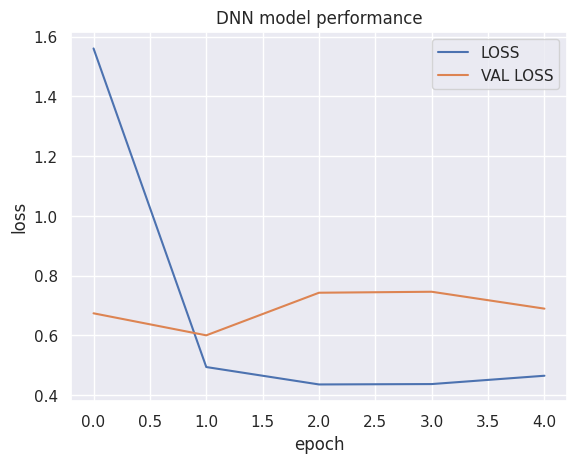

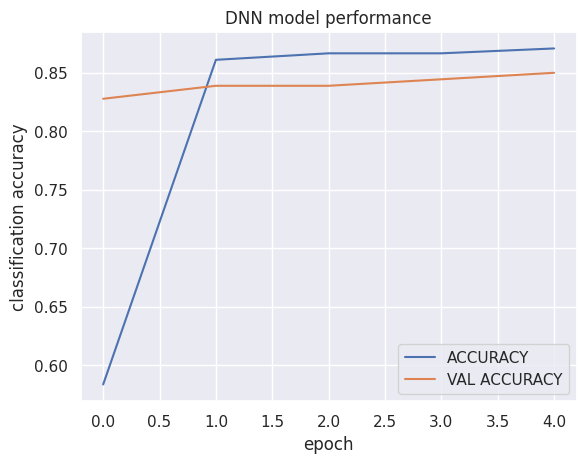

In [77]:
import matplotlib.pyplot as plt

plt.title("DNN model performance")

plt.plot(history.history["loss"], label = "LOSS")
plt.plot(history.history["val_loss"], label = "VAL LOSS")

plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.show()

plt.title("DNN model performance")

plt.plot(history.history["accuracy"], label = "ACCURACY")
plt.plot(history.history["val_accuracy"], label = "VAL ACCURACY")

plt.xlabel("epoch")
plt.ylabel("classification accuracy")
plt.legend()

plt.show()